#### Importăm modulele necesare:

In [14]:
import signal_processing, data_load, learn, evaluate, render

#### Valorile parametrilor funcției de extragere a datelor:

In [15]:
num_rows = 45
num_columns = 130
num_channels = 1

num_epochs = 100
num_batch_size = 13
num_speakers = 10
num_seconds = 3.0

#### Extragem datele într-un dataframe:

In [16]:
featuresdf = data_load.make_dataframe_class_no(num_speakers, './Dataset/wav/', num_rows, num_columns, num_seconds)

Finished feature extraction from  1001  files


In [17]:
result_sets = data_load.make_train_test_sets(featuresdf, num_rows, num_columns, num_channels)
num_labels = result_sets[4]
model = learn.build_CNN_model(num_rows, num_columns, num_labels)

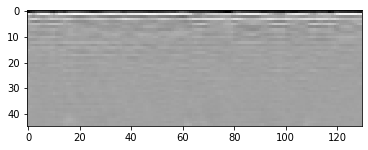

In [18]:
path = 'C:/Users/Maria/Documents/Licenta/Proiect/Dataset/wav/id10001/9mQ11vBs1wc/00004.wav'
render.show_mfccs(path, num_rows, num_columns, num_seconds)

In [19]:
learn.compile(model)

#### Modelul are o acuratețe de aproximativ 5% înainte de antrenament:

In [20]:
evaluate.evaluate_before_training(model, result_sets[0], result_sets[2]) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 44, 129, 16)       80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 64, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 22, 64, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 63, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 31, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 30, 64)        

In [21]:
featuresdf

,feature,class_label,class
0,"[[-202.58553, -199.25586, -199.08582, -209.295...",A.J._Buckley,0
1,"[[-115.306145, -126.16454, -150.82576, -156.61...",A.J._Buckley,0
2,"[[-200.25298, -189.63104, -170.79625, -169.586...",A.J._Buckley,0
3,"[[-364.86426, -365.99326, -312.48773, -243.440...",A.J._Buckley,0
4,"[[-180.10895, -186.5982, -191.97629, -180.9856...",A.J._Buckley,0
...,...,...,...
996,"[[-234.07841, -273.76657, -326.95514, -305.263...",Adam_Brody,9
997,"[[-491.7063, -494.57523, -505.03894, -505.7204...",Adam_Brody,9
998,"[[-416.73138, -420.37796, -425.61163, -456.735...",Adam_Brody,9
999,"[[-311.0644, -320.13596, -334.85696, -329.8414...",Adam_Brody,9


#### Antrenăm modelul timp de 100 de epoci:

In [22]:
class_weight = learn.calculate_class_weight(featuresdf)
history = learn.train_model_class_weights(model, result_sets, num_epochs, num_batch_size, 'CNNCwImproved', 'default', 'CNNCwImproved', class_weight)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 800 samples, validate on 201 samples
Epoch 1/100
793/800 [============================>.] - ETA: 0s - loss: 17.2899 - accuracy: 0.1576
Epoch 00001: val_loss improved from inf to 11.08377, saving model to saved_models/weights.best.CNNCwImproved.hdf5
800/800 [==============================] - 5s 6ms/sample - loss: 17.2447 - accuracy: 0.1575 - val_loss: 11.0838 - val_accuracy: 0.1741
Epoch 2/100
793/800 [============================>.] - ETA: 0s - loss: 10.2553 - accuracy: 0.2509
Epoch 00002: val_loss improved from 11.08377 to 10.36263, saving model to saved_models/weights.best.CNNCwImproved.hdf5
800/800 [==============================] - 4s 5ms/sample - loss: 10.2341 - accuracy: 0.2500 - val_loss: 10.3626 - val_accuracy: 0.2935
Epoch 3/100
793/800 [============================>.] - ETA: 0s - loss: 9.6848 - accuracy: 0.3228
Epoch 00003: val_loss improved from 10.36263 to 9.91937, saving model to saved_models/weights.best.CNNCwImpr

Epoch 25/100
793/800 [============================>.] - ETA: 0s - loss: 2.7315 - accuracy: 0.8058
Epoch 00025: val_loss did not improve from 2.85414
800/800 [==============================] - 4s 5ms/sample - loss: 2.7211 - accuracy: 0.8062 - val_loss: 2.9515 - val_accuracy: 0.8010
Epoch 26/100
793/800 [============================>.] - ETA: 0s - loss: 2.7281 - accuracy: 0.8008
Epoch 00026: val_loss did not improve from 2.85414
800/800 [==============================] - 4s 5ms/sample - loss: 2.7138 - accuracy: 0.8025 - val_loss: 2.8855 - val_accuracy: 0.8408
Epoch 27/100
793/800 [============================>.] - ETA: 0s - loss: 2.6004 - accuracy: 0.8121
Epoch 00027: val_loss did not improve from 2.85414
800/800 [==============================] - 4s 5ms/sample - loss: 2.6372 - accuracy: 0.8112 - val_loss: 3.1135 - val_accuracy: 0.7910
Epoch 28/100
793/800 [============================>.] - ETA: 0s - loss: 2.4690 - accuracy: 0.8323
Epoch 00028: val_loss did not improve from 2.85414
800/8

Epoch 53/100
793/800 [============================>.] - ETA: 0s - loss: 1.0069 - accuracy: 0.9231
Epoch 00053: val_loss did not improve from 2.03239
800/800 [==============================] - 4s 5ms/sample - loss: 0.9998 - accuracy: 0.9237 - val_loss: 2.8874 - val_accuracy: 0.8905
Epoch 54/100
793/800 [============================>.] - ETA: 0s - loss: 0.9776 - accuracy: 0.9306 ETA: 0s - loss: 0.9631 
Epoch 00054: val_loss did not improve from 2.03239
800/800 [==============================] - 4s 5ms/sample - loss: 0.9781 - accuracy: 0.9300 - val_loss: 2.4494 - val_accuracy: 0.8607
Epoch 55/100
793/800 [============================>.] - ETA: 0s - loss: 0.8683 - accuracy: 0.9306
Epoch 00055: val_loss did not improve from 2.03239
800/800 [==============================] - 4s 5ms/sample - loss: 0.8618 - accuracy: 0.9312 - val_loss: 2.2436 - val_accuracy: 0.8756
Epoch 56/100
793/800 [============================>.] - ETA: 0s - loss: 1.0179 - accuracy: 0.9155
Epoch 00056: val_loss did not im

793/800 [============================>.] - ETA: 0s - loss: 0.5120 - accuracy: 0.9584
Epoch 00081: val_loss did not improve from 1.99916
800/800 [==============================] - 4s 5ms/sample - loss: 0.5130 - accuracy: 0.9575 - val_loss: 3.1215 - val_accuracy: 0.8806
Epoch 82/100
793/800 [============================>.] - ETA: 0s - loss: 0.7767 - accuracy: 0.9458
Epoch 00082: val_loss did not improve from 1.99916
800/800 [==============================] - 4s 5ms/sample - loss: 0.8378 - accuracy: 0.9425 - val_loss: 2.3235 - val_accuracy: 0.9005
Epoch 83/100
793/800 [============================>.] - ETA: 0s - loss: 0.9147 - accuracy: 0.9369
Epoch 00083: val_loss did not improve from 1.99916
800/800 [==============================] - 4s 5ms/sample - loss: 0.9077 - accuracy: 0.9375 - val_loss: 2.1312 - val_accuracy: 0.9254
Epoch 84/100
793/800 [============================>.] - ETA: 0s - loss: 0.3508 - accuracy: 0.9697 ETA: 0s - loss:
Epoch 00084: val_loss improved from 1.99916 to 1.8961

In [23]:
evaluate.evaluate_model(model, 'CNNCwImproved', result_sets)

Training Accuracy:  0.99875
Testing Accuracy:  0.9104478


In [24]:
evaluate.display_metrics(model, 'CNNCwImproved', result_sets)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       1.00      1.00      1.00        17
           2       1.00      0.96      0.98        47
           3       1.00      0.71      0.83        17
           4       0.82      0.93      0.87        15
           5       0.78      1.00      0.88        29
           6       1.00      0.88      0.93        16
           7       0.89      0.80      0.84        20
           8       0.91      0.91      0.91        11
           9       0.85      0.92      0.88        12

    accuracy                           0.91       201
   macro avg       0.91      0.90      0.90       201
weighted avg       0.92      0.91      0.91       201

Confusion matrix: 
[[15  0  0  0  0  0  0  1  0  1]
 [ 0 17  0  0  0  0  0  0  0  0]
 [ 0  0 45  0  2  0  0  0  0  0]
 [ 1  0  0 12  0  2  0  1  0  1]
 [ 1  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  0]
 [ 0  0  0  0  0  2 14  

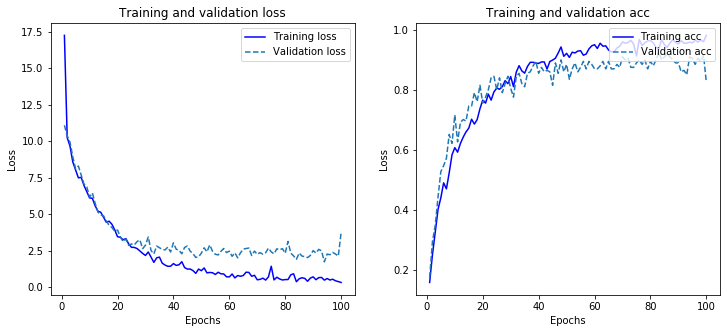

In [25]:
evaluate.plot_history(history)